In [1]:
import json
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from telemetry_data_preprocessing import telemetry_computations, telemetry_preprocessing
import fastf1
import fastf1.logger


req         WARNING 	DEFAULT CACHE ENABLED! (103.02 MB) C:\Users\Patryk\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21'

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  0.00000e+00  0.00000e+00  0.0000

In [2]:
fastf1.logger.set_log_level('ERROR')

computations = telemetry_computations()

fastf1.Cache.enable_cache('fastf1_cache')

driver_number = "1"
country_name = "Bahrain"
year = 2023

In [3]:
session = fastf1.get_session(year, country_name, 'Q') 
session.load()  

quali_laps = session.laps.pick_driver(driver_number)
quali_car_data = session.car_data[driver_number]
quali_pos_data = session.pos_data[driver_number]

race = fastf1.get_session(year, country_name, 'R')  
race.load()

race_laps = race.laps.pick_driver(driver_number)
race_car_data = race.car_data[driver_number]
race_pos_data = race.pos_data[driver_number]

c:\Users\Patryk\.conda\envs\f1proj\Lib\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
c:\Users\Patryk\.conda\envs\f1proj\Lib\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


In [4]:
laps = race.laps.pick_driver('VER')

telemetry_list = []

for index, lap in laps.iterlaps():
    telemetry = lap.get_telemetry()
    telemetry['LapNumber'] = lap['LapNumber']
    
    telemetry_list.append(telemetry)
    
telemetry = pd.concat(telemetry_list)

c:\Users\Patryk\.conda\envs\f1proj\Lib\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


In [5]:
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z,LapNumber
2,2023-03-05 15:03:38.501,0 days 01:02:36.652000,,0.155556,0 days 00:00:00,10076.374938,0.000000,1,16.0,False,1,interpolation,0.000194,3.748547e-08,OnTrack,-279.999631,3558.983052,-156.999885,1.0
3,2023-03-05 15:03:38.611,0 days 01:02:36.762000,,0.155556,0 days 00:00:00.110000,10130.000000,0.000000,1,16.0,False,1,car,0.000000,0.000000e+00,OnTrack,-279.999617,3558.982418,-156.999881,1.0
4,2023-03-05 15:03:38.686,0 days 01:02:36.837000,,0.155556,0 days 00:00:00.185000,9993.499884,0.000000,1,16.0,False,1,pos,-0.000268,-5.186355e-08,OnTrack,-280.000000,3559.000000,-157.000000,1.0
5,2023-03-05 15:03:38.811,0 days 01:02:36.962000,,0.155556,0 days 00:00:00.310000,9766.000000,0.000000,1,16.0,False,1,car,0.000000,0.000000e+00,OnTrack,-280.001327,3559.060983,-157.000413,1.0
6,2023-03-05 15:03:38.946,0 days 01:02:37.097000,,0.155556,0 days 00:00:00.445000,8956.001152,0.964284,1,16.0,False,1,pos,0.003325,6.439951e-07,OnTrack,-280.000000,3559.000000,-157.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2023-03-05 16:37:34.828,0 days 02:36:32.979000,,NaN,0 days 00:01:35.733000,10525.000000,271.000000,7,0.0,True,0,car,5322.452222,9.914971e-01,OnTrack,-407.146267,742.650673,-158.999991,57.0
740,2023-03-05 16:37:35.005,0 days 02:36:33.156000,,NaN,0 days 00:01:35.910000,10218.568861,263.256253,7,0.0,True,0,pos,5335.352916,9.939003e-01,OnTrack,-400.000000,881.000000,-159.000000,57.0
741,2023-03-05 16:37:35.148,0 days 02:36:33.299000,,NaN,0 days 00:01:36.053000,9971.000000,257.000000,7,0.0,True,0,car,5345.296667,9.957527e-01,OnTrack,-394.385089,984.164803,-159.000000,57.0
742,2023-03-05 16:37:35.185,0 days 02:36:33.336000,,NaN,0 days 00:01:36.090000,9861.233523,254.019450,7,0.0,True,0,pos,5347.787384,9.962167e-01,OnTrack,-393.000000,1010.000000,-159.000000,57.0


In [6]:
telemetry = telemetry.drop(["DriverAhead", "RPM", "Source", "Status", "RelativeDistance"], axis = 1)

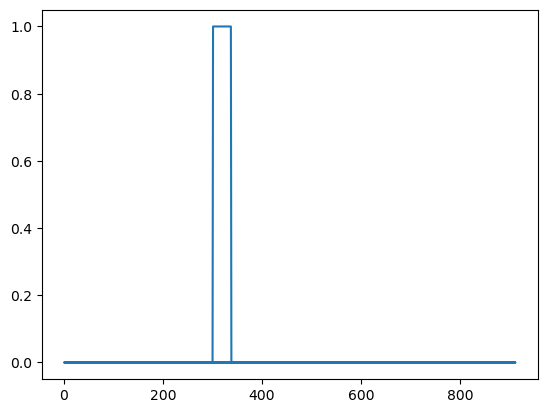

In [7]:
telemetry.DRS = telemetry.DRS.apply(lambda x: 1 if x in [10, 12, 14] else 0)

plt.plot(telemetry.DRS)

In [8]:
telemetry

,Date,SessionTime,DistanceToDriverAhead,Time,Speed,nGear,Throttle,Brake,DRS,Distance,X,Y,Z,LapNumber
2,2023-03-05 15:03:38.501,0 days 01:02:36.652000,0.155556,0 days 00:00:00,0.000000,1,16.0,False,0,0.000194,-279.999631,3558.983052,-156.999885,1.0
3,2023-03-05 15:03:38.611,0 days 01:02:36.762000,0.155556,0 days 00:00:00.110000,0.000000,1,16.0,False,0,0.000000,-279.999617,3558.982418,-156.999881,1.0
4,2023-03-05 15:03:38.686,0 days 01:02:36.837000,0.155556,0 days 00:00:00.185000,0.000000,1,16.0,False,0,-0.000268,-280.000000,3559.000000,-157.000000,1.0
5,2023-03-05 15:03:38.811,0 days 01:02:36.962000,0.155556,0 days 00:00:00.310000,0.000000,1,16.0,False,0,0.000000,-280.001327,3559.060983,-157.000413,1.0
6,2023-03-05 15:03:38.946,0 days 01:02:37.097000,0.155556,0 days 00:00:00.445000,0.964284,1,16.0,False,0,0.003325,-280.000000,3559.000000,-157.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2023-03-05 16:37:34.828,0 days 02:36:32.979000,NaN,0 days 00:01:35.733000,271.000000,7,0.0,True,0,5322.452222,-407.146267,742.650673,-158.999991,57.0
740,2023-03-05 16:37:35.005,0 days 02:36:33.156000,NaN,0 days 00:01:35.910000,263.256253,7,0.0,True,0,5335.352916,-400.000000,881.000000,-159.000000,57.0
741,2023-03-05 16:37:35.148,0 days 02:36:33.299000,NaN,0 days 00:01:36.053000,257.000000,7,0.0,True,0,5345.296667,-394.385089,984.164803,-159.000000,57.0
742,2023-03-05 16:37:35.185,0 days 02:36:33.336000,NaN,0 days 00:01:36.090000,254.019450,7,0.0,True,0,5347.787384,-393.000000,1010.000000,-159.000000,57.0


In [9]:
telemetry_test = telemetry.copy()

In [10]:
submodel_data = pd.DataFrame()

In [11]:
telemetry_test["mean_lap_speed"] = telemetry_test.groupby(by = "LapNumber")["Speed"].transform("mean")

submodel_data["mean_lap_speed"] = telemetry_test.groupby(by = "LapNumber")["Speed"].transform("mean")

telemetry_test

,Date,SessionTime,DistanceToDriverAhead,Time,Speed,nGear,Throttle,Brake,DRS,Distance,X,Y,Z,LapNumber,mean_lap_speed
2,2023-03-05 15:03:38.501,0 days 01:02:36.652000,0.155556,0 days 00:00:00,0.000000,1,16.0,False,0,0.000194,-279.999631,3558.983052,-156.999885,1.0,185.815557
3,2023-03-05 15:03:38.611,0 days 01:02:36.762000,0.155556,0 days 00:00:00.110000,0.000000,1,16.0,False,0,0.000000,-279.999617,3558.982418,-156.999881,1.0,185.815557
4,2023-03-05 15:03:38.686,0 days 01:02:36.837000,0.155556,0 days 00:00:00.185000,0.000000,1,16.0,False,0,-0.000268,-280.000000,3559.000000,-157.000000,1.0,185.815557
5,2023-03-05 15:03:38.811,0 days 01:02:36.962000,0.155556,0 days 00:00:00.310000,0.000000,1,16.0,False,0,0.000000,-280.001327,3559.060983,-157.000413,1.0,185.815557
6,2023-03-05 15:03:38.946,0 days 01:02:37.097000,0.155556,0 days 00:00:00.445000,0.964284,1,16.0,False,0,0.003325,-280.000000,3559.000000,-157.000000,1.0,185.815557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2023-03-05 16:37:34.828,0 days 02:36:32.979000,NaN,0 days 00:01:35.733000,271.000000,7,0.0,True,0,5322.452222,-407.146267,742.650673,-158.999991,57.0,200.748140
740,2023-03-05 16:37:35.005,0 days 02:36:33.156000,NaN,0 days 00:01:35.910000,263.256253,7,0.0,True,0,5335.352916,-400.000000,881.000000,-159.000000,57.0,200.748140
741,2023-03-05 16:37:35.148,0 days 02:36:33.299000,NaN,0 days 00:01:36.053000,257.000000,7,0.0,True,0,5345.296667,-394.385089,984.164803,-159.000000,57.0,200.748140
742,2023-03-05 16:37:35.185,0 days 02:36:33.336000,NaN,0 days 00:01:36.090000,254.019450,7,0.0,True,0,5347.787384,-393.000000,1010.000000,-159.000000,57.0,200.748140


In [12]:
telemetry["last_10_EMA"] = telemetry["Speed"].ewm(span=10).mean()
telemetry["last_5_EMA"] = telemetry["Speed"].ewm(span=5).mean()
telemetry["last_10_SMA"] = telemetry["Speed"].rolling(window=10).mean()
telemetry["last_5_SMA"] = telemetry["Speed"].rolling(window=5).mean()

In [13]:
submodel_data["last_10_EMA"] = telemetry_test["mean_lap_speed"].ewm(span=10).mean()
submodel_data["last_5_EMA"] = telemetry_test["mean_lap_speed"].ewm(span=5).mean()
submodel_data["last_10_SMA"] = telemetry_test["mean_lap_speed"].rolling(window=10).mean()
submodel_data["last_5_SMA"] = telemetry_test["mean_lap_speed"].rolling(window=5).mean()

In [14]:
lon, lat = computations.compute_accelerations(telemetry=telemetry)

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
submodel_data["lat_acc"] = lat
submodel_data["lon_acc"] = lon

In [16]:
telemetry['TimeNumberLapTime'] = telemetry.groupby('LapNumber').cumcount() + 1
telemetry['TimeNumberLapCounts'] = telemetry.groupby('LapNumber')['LapNumber'].transform('count')

submodel_data['LapProgress'] =  telemetry['TimeNumberLapTime'] / telemetry['TimeNumberLapCounts']
submodel_data['LapNumber'] = telemetry['LapNumber']

In [17]:
submodel_data    

,mean_lap_speed,last_10_EMA,last_5_EMA,last_10_SMA,last_5_SMA,lat_acc,lon_acc,LapProgress,LapNumber
2,185.815557,185.815557,185.815557,NaN,NaN,0.00000,0.00000,0.001312,1.0
3,185.815557,185.815557,185.815557,NaN,NaN,0.00000,0.00000,0.002625,1.0
4,185.815557,185.815557,185.815557,NaN,NaN,-0.00000,0.00000,0.003937,1.0
5,185.815557,185.815557,185.815557,NaN,NaN,-0.00000,0.10502,0.005249,1.0
6,185.815557,185.815557,185.815557,NaN,185.815557,-0.45947,0.20226,0.006562,1.0
...,...,...,...,...,...,...,...,...,...
739,200.748140,200.748140,200.748140,200.74814,200.748140,-0.06975,-0.73090,0.994609,57.0
740,200.748140,200.748140,200.748140,200.74814,200.748140,-0.07614,-1.23882,0.995957,57.0
741,200.748140,200.748140,200.748140,200.74814,200.748140,0.11348,-1.45304,0.997305,57.0
742,200.748140,200.748140,200.748140,200.74814,200.748140,0.11467,-2.28099,0.998652,57.0


In [18]:
def divide_column_by_sign(df : pd.DataFrame, column : str) -> pd.DataFrame:
    
    df[f"positive_{column}"] = df[column].apply(lambda x: 0 if x < 0 else x)
    df[f"negative_{column}"] = df[column].apply(lambda x: 0 if x > 0 else x)
    
    return df


submodel_data = divide_column_by_sign(submodel_data, "lat_acc")

submodel_data    

,mean_lap_speed,last_10_EMA,last_5_EMA,last_10_SMA,last_5_SMA,lat_acc,lon_acc,LapProgress,LapNumber,positive_lat_acc,negative_lat_acc
2,185.815557,185.815557,185.815557,NaN,NaN,0.00000,0.00000,0.001312,1.0,0.00000,0.00000
3,185.815557,185.815557,185.815557,NaN,NaN,0.00000,0.00000,0.002625,1.0,0.00000,0.00000
4,185.815557,185.815557,185.815557,NaN,NaN,-0.00000,0.00000,0.003937,1.0,-0.00000,-0.00000
5,185.815557,185.815557,185.815557,NaN,NaN,-0.00000,0.10502,0.005249,1.0,-0.00000,-0.00000
6,185.815557,185.815557,185.815557,NaN,185.815557,-0.45947,0.20226,0.006562,1.0,0.00000,-0.45947
...,...,...,...,...,...,...,...,...,...,...,...
739,200.748140,200.748140,200.748140,200.74814,200.748140,-0.06975,-0.73090,0.994609,57.0,0.00000,-0.06975
740,200.748140,200.748140,200.748140,200.74814,200.748140,-0.07614,-1.23882,0.995957,57.0,0.00000,-0.07614
741,200.748140,200.748140,200.748140,200.74814,200.748140,0.11348,-1.45304,0.997305,57.0,0.11348,0.00000
742,200.748140,200.748140,200.748140,200.74814,200.748140,0.11467,-2.28099,0.998652,57.0,0.11467,0.00000


Submodel dla okrążenia

In [23]:
lap_df =  submodel_data.copy()

lap_df['abs_lat_acc'] = lap_df['lat_acc'].abs()
lap_df['sum_lat_acc'] = lap_df.groupby('LapNumber')['abs_lat_acc'].transform('sum')

lap_df['abs_lon_acc'] = lap_df['lon_acc'].abs()
lap_df['sum_lon_acc'] = lap_df.groupby('LapNumber')['abs_lon_acc'].transform('sum')


In [24]:
lap_df

,mean_lap_speed,last_10_EMA,last_5_EMA,last_10_SMA,last_5_SMA,lat_acc,lon_acc,LapProgress,LapNumber,positive_lat_acc,negative_lat_acc,abs_lat_acc,sum_lat_acc,abs_lon_acc,sum_lon_acc
2,185.815557,185.815557,185.815557,NaN,NaN,0.00000,0.00000,0.001312,1.0,0.00000,0.00000,0.00000,840.62035,0.00000,560.87748
3,185.815557,185.815557,185.815557,NaN,NaN,0.00000,0.00000,0.002625,1.0,0.00000,0.00000,0.00000,840.62035,0.00000,560.87748
4,185.815557,185.815557,185.815557,NaN,NaN,-0.00000,0.00000,0.003937,1.0,-0.00000,-0.00000,0.00000,840.62035,0.00000,560.87748
5,185.815557,185.815557,185.815557,NaN,NaN,-0.00000,0.10502,0.005249,1.0,-0.00000,-0.00000,0.00000,840.62035,0.10502,560.87748
6,185.815557,185.815557,185.815557,NaN,185.815557,-0.45947,0.20226,0.006562,1.0,0.00000,-0.45947,0.45947,840.62035,0.20226,560.87748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,200.748140,200.748140,200.748140,200.74814,200.748140,-0.06975,-0.73090,0.994609,57.0,0.00000,-0.06975,0.06975,859.40488,0.73090,553.94680
740,200.748140,200.748140,200.748140,200.74814,200.748140,-0.07614,-1.23882,0.995957,57.0,0.00000,-0.07614,0.07614,859.40488,1.23882,553.94680
741,200.748140,200.748140,200.748140,200.74814,200.748140,0.11348,-1.45304,0.997305,57.0,0.11348,0.00000,0.11348,859.40488,1.45304,553.94680
742,200.748140,200.748140,200.748140,200.74814,200.748140,0.11467,-2.28099,0.998652,57.0,0.11467,0.00000,0.11467,859.40488,2.28099,553.94680


In [ ]:
def compute_binned(df : pd.DataFrame, column : str = 'lat', bins : int = 10, aggfunc : str ='mean') -> pd.DataFrame:
    
    df['bin'] = pd.cut(df['LapProgress'], bins=bins, labels=False, include_lowest=True)
    
    result = (
        df.groupby(['LapNumber', 'bin'])[column]
        .agg(aggfunc)
        .reset_index()
        .rename(columns={column: f'{aggfunc}_of_{column}'})
    )
    return result

In [48]:
binned_result = compute_binned(submodel_data, column='lat_acc', bins=10, aggfunc='sum')

binned_result

,LapNumber,bin,sum_of_lat_acc
0,1.0,0,-1.40
1,1.0,1,-27.03
2,1.0,2,-79.70
3,1.0,3,-1.87
4,1.0,4,-30.47
...,...,...,...
565,57.0,5,60.15
566,57.0,6,110.83
567,57.0,7,-165.74
568,57.0,8,-3.58


Podejścia:

suma z sektorów porównana do:

- średniej kroczącej z innych okrążeń

- top okrążenia w stincie

- top okrążenia kwalifikacyjnego


In [ ]:
circuitinfo = session.get_circuit_info()

circuitinfo.corners